In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from scipy import stats
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel
from statsmodels.base.model import LikelihoodModel
from sklearn import preprocessing

from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
import unicodedata
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
def subID_list():
    subID = ['797','806','809','826','843','845','855','856','857','1031','1153','1154','1157','1174','1262','1264','1266',
        '1364','1367','1379','1380','1381','1384','1435','1465','1467','1468','1489','1492','1493','1494','1495','1498','1519',
        '1520','1527','1532','1536','1541','1721','1722','1737','1741','1788','1791','1810','1812','1833','1934',
            '2310','2316','2318','2323','2338','2339','2340','2348','2353','2356','2357','2358','2377','2378',
             '2381','2383','2385','2386','2387','2388','2389','2390','2391','2394','2395','2396','2399',
             '2401','2402','2404','2405','2407','2434','2444','2456',
            '2433','2447','2477','2479','2489','2547','2548','2549','2553','2555','2558','2559','2578','2951','2958',
            '2961','2962','2963','2964','2967','2968','2975','2977','2978','2981','2983',
             '2998','2999','3051','3052','3053']
    return subID

In [74]:
df = pd.read_csv("/Users/zyy219/Dropbox/Risk_project/Data/explanatory_variable_matrix.csv")
df = df.drop(['Unnamed: 0'], axis = 1)

In [75]:
df

,subID,E_LI,F_LI,S_LI,R_LI,S_LI.1,IUS,lot_pos,lot_neg,drm_pos,...,TD_RT,Gender,Age,k,TD_gamma,alpha_EU,gamma_EU,alpha_ESVT,M_ESVT,gamma_ESVT
0,797,14.0,15.0,14.0,10.0,24.0,62.0,9.0,12.0,3.063750,...,118.285714,0,26,0.088999,0.803343,0.624,3.520,1.000,25.087,59.220
1,806,10.0,13.0,15.0,15.0,13.0,69.0,7.0,9.0,3.916250,...,112.857143,0,27,0.026369,1.131074,0.609,1.892,1.000,22.349,28.261
2,809,23.0,16.0,23.0,17.0,36.0,96.0,9.0,11.0,4.333125,...,87.142857,0,25,0.000000,2.497529,0.698,1.552,1.000,38.166,33.913
3,826,18.0,20.0,22.0,26.0,33.0,73.0,10.0,11.0,2.687500,...,96.142857,1,27,0.218044,0.665183,0.727,1.532,1.000,38.399,47.973
4,845,18.0,17.0,23.0,12.0,30.0,81.0,12.0,7.0,5.250000,...,144.750000,0,38,0.018835,1.228933,0.560,2.149,1.000,16.955,20.506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2983,21.0,15.0,22.0,21.0,37.0,64.0,13.0,4.0,4.271250,...,81.000000,0,28,0.018851,1.384900,0.452,3.500,1.826,5.861,24.997
92,2998,16.0,19.0,24.0,11.0,27.0,77.0,9.0,7.0,4.416250,...,196.250000,1,41,0.076667,0.598413,0.783,1.047,1.000,59.674,44.746
93,2999,16.0,8.0,21.0,30.0,40.0,47.0,12.0,11.0,2.270625,...,142.000000,1,35,0.162944,0.375131,0.695,0.746,1.000,33.759,18.135
94,3051,21.0,27.0,26.0,29.0,30.0,42.0,15.0,6.0,4.708125,...,101.375000,1,43,0.022445,2.005318,0.881,1.852,1.000,92.962,153.543


In [76]:
subID = subID_list()

R = [843, 856, 857,1031,1381,1435,1465,1492,1493,1519,
    1520,1721,2340,2378,2387,2401,2444,2447,3053]
#N = [i for i in range(len(subID)) if subID[i] in R]

df = df[~df.subID.isin(R)]
censored_df = df.drop(['subID'], axis = 1)
column_name = censored_df.columns.tolist()

In [78]:
np.sum(pd.isnull(censored_df))

E_LI          0
F_LI          0
S_LI          0
R_LI          0
S_LI.1        0
IUS           0
lot_pos       0
lot_neg       0
drm_pos       0
drm_neg       0
BAS           0
BIS           0
BIS11         0
UPPS          0
phq           0
stais         0
stait         0
bai           0
bsi           0
IQ            3
crt           2
risk_ratio    0
amb_ratio     0
risk_RT       0
TD_ratio      0
TD_RT         0
Gender        0
Age           0
k             0
TD_gamma      0
alpha_EU      0
gamma_EU      0
alpha_ESVT    0
M_ESVT        0
gamma_ESVT    0
dtype: int64

In [6]:
# find out which variable has missing data
#np.sum(pd.isnull(censored_df))

In [7]:
x= censored_df.dropna().to_numpy()
# Standardizing the features
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2','PC3','PC4','PC5'])
print(pca.explained_variance_ratio_)


loading_matrix_linear_com = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3','PC4','PC5'],index=column_name)
np.round(loading_matrix_linear_com,2)

[0.18206357 0.1146174  0.09637224 0.07417364 0.05878508]


,PC1,PC2,PC3,PC4,PC5
E_LI,0.07,0.14,-0.06,0.30,-0.05
F_LI,-0.06,0.21,-0.17,0.23,-0.16
S_LI,0.00,0.21,-0.03,0.38,0.12
R_LI,-0.00,0.16,-0.03,0.40,-0.06
S_LI.1,-0.07,0.11,0.12,0.35,-0.03
IUS,0.28,0.02,-0.03,-0.02,0.00
lot_pos,-0.24,0.16,0.10,0.07,-0.18
lot_neg,0.28,0.01,0.04,-0.09,-0.03
drm_pos,-0.24,0.18,0.01,-0.04,-0.17
drm_neg,0.29,0.14,-0.02,-0.02,-0.03


In [10]:
print(pca.explained_variance_) 
np.sum(pca.explained_variance_ratio_[0:5])

[6.44148815 4.05521335 3.40969193 2.62429571 2.07984183 1.75631203
 1.58927344 1.27766176 1.21950602 1.12331744]


0.5260119352691182

## SVD decomposition

In [41]:
u, s, vh = np.linalg.svd(x, full_matrices=True)
# variance ratio 
s[3]**2/np.sum(s**2)
# components
vh[0,:]
#np.sum(pca.components_[4]**2) #the sum square equals to one

array([ 0.07477396, -0.06273708,  0.00322771, -0.00083339, -0.07300741,
        0.28224028, -0.243191  ,  0.2756949 , -0.24065713,  0.29043592,
        0.045101  ,  0.03972356,  0.16584948,  0.23617766,  0.31164784,
        0.31601392,  0.34427272,  0.24647404,  0.30639137,  0.06408723,
        0.05911031, -0.07264182, -0.08870782, -0.04192486,  0.05689331,
       -0.02362295, -0.08544529, -0.11998485, -0.02775745,  0.06990961,
        0.0013543 ,  0.07935836,  0.01960702, -0.09504162, -0.04057097])

In [8]:
x= censored_df.dropna().to_numpy()
# Standardizing the features
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
print(pca.explained_variance_ratio_)


loading_matrix_linear_com = pd.DataFrame(pca.components_.T, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'],index=column_name)
np.round(loading_matrix_linear_com,2)

[0.18206357 0.1146174  0.09637224 0.07417364 0.05878508 0.04964077
 0.04491956 0.0361121  0.03446837 0.03174968]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
E_LI,0.07,0.14,-0.06,0.30,-0.05,0.06,-0.13,-0.23,0.31,-0.38
F_LI,-0.06,0.21,-0.17,0.23,-0.16,0.20,0.09,-0.23,-0.11,-0.06
S_LI,0.00,0.21,-0.03,0.38,0.12,-0.15,-0.17,-0.10,0.03,-0.09
R_LI,-0.00,0.16,-0.03,0.40,-0.06,-0.02,-0.16,-0.16,-0.23,0.28
S_LI.1,-0.07,0.11,0.12,0.35,-0.03,0.03,-0.08,0.04,0.12,0.21
IUS,0.28,0.02,-0.03,-0.02,0.00,-0.20,0.06,0.09,0.03,-0.42
lot_pos,-0.24,0.16,0.10,0.07,-0.18,-0.12,0.30,-0.03,0.06,-0.04
lot_neg,0.28,0.01,0.04,-0.09,-0.03,0.14,-0.20,-0.08,-0.09,-0.05
drm_pos,-0.24,0.18,0.01,-0.04,-0.17,0.01,0.29,0.18,0.00,-0.01
drm_neg,0.29,0.14,-0.02,-0.02,-0.03,0.16,0.21,0.01,-0.01,-0.04


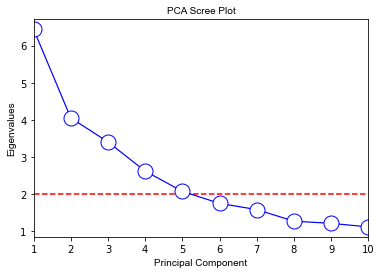

In [39]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_, 'bo-',linewidth=1.2,markerfacecolor='white',ms=15)
plt.title('PCA Scree Plot', fontsize = 12, font = 'Arial')
plt.xlim([1,10])
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.hlines(y = 2, xmin = 1, xmax = 10, color = 'red',linestyle='--')
plt.xlabel('Principal Component',fontsize = 12, font = 'Arial')
plt.ylabel('Eigenvalues',fontsize = 12, font = 'Arial')

plt.savefig('PCA-Scree-Plot.png',dpi=500)
plt.show()

In [66]:
risk_ratio_weekly = pd.read_csv("/Users/zyy219/Documents/Risk_project/Data/Weekly_measurement/risk_ratio_weekly.csv")
risk_EU_alpha_weekly  = pd.read_csv("/Users/zyy219/Documents/Risk_project/Data/Weekly_measurement/risk_EU_alpha_weekly.csv")
risk_EU_gamma_weekly  = pd.read_csv("/Users/zyy219/Documents/Risk_project/Data/Weekly_measurement/risk_EU_gamma_weekly.csv")
risk_ESVT_alpha_weekly  = pd.read_csv("/Users/zyy219/Documents/Risk_project/Data/Weekly_measurement/risk_ESVT_alpha_weekly.csv")
risk_ESVT_M_weekly  = pd.read_csv("/Users/zyy219/Documents/Risk_project/Data/Weekly_measurement/risk_ESVT_M_weekly.csv")
risk_ESVT_gamma_weekly  = pd.read_csv("/Users/zyy219/Documents/Risk_project/Data/Weekly_measurement/risk_ESVT_gamma_weekly.csv")

In [98]:


R = ['843', '856', '857','1031','1381','1435','1465','1492','1493','1519',
    '1520','1721','2340','2378','2387','2401','2444','2447','3053']
N = [i for i in range(len(subID)) if subID[i] in R]

risk_ratio_weekly = risk_ratio_weekly[~risk_ratio_weekly['Unnamed: 0'].isin(N)]
risk_EU_alpha_weekly  = risk_EU_alpha_weekly[~risk_EU_alpha_weekly['Unnamed: 0'].isin(N)]
risk_EU_gamma_weekly  = risk_EU_gamma_weekly[~risk_EU_gamma_weekly['Unnamed: 0'].isin(N)]
risk_ESVT_alpha_weekly  = risk_ESVT_alpha_weekly[~risk_ESVT_alpha_weekly['Unnamed: 0'].isin(N)]
risk_ESVT_M_weekly  = risk_ESVT_M_weekly[~risk_ESVT_M_weekly['Unnamed: 0'].isin(N)]
risk_ESVT_gamma_weekly  = risk_ESVT_gamma_weekly[~risk_ESVT_gamma_weekly['Unnamed: 0'].isin(N)]

In [100]:
week = [1,2,3,4,5,6,7,8]
pc3_score = np.zeros((len(week),96))
for i in range(len(week)):
    censored_df['risk_ratio'] = risk_ratio_weekly.iloc[:,i+1].tolist()
    censored_df['alpha_EU'] = risk_EU_alpha_weekly.iloc[:,i+1].tolist()
    censored_df['gamma_EU'] = risk_EU_gamma_weekly.iloc[:,i+1].tolist()
    censored_df['alpha_ESVT'] = risk_ESVT_alpha_weekly.iloc[:,i+1].tolist()
    censored_df['M_ESVT'] = risk_ESVT_M_weekly.iloc[:,i+1].tolist()
    censored_df['gamma_ESVT'] = risk_ESVT_gamma_weekly.iloc[:,i+1].tolist()
    
    
    pc3 = loading_matrix_linear_com['PC3']
    e = np.array(censored_df.iloc[:,0:35]).dot(np.array(pc3))
    pc3_score[i,:] = e

In [102]:
censored_df['subID'] = df['subID']
pc3_score_df = pd.DataFrame(data=pc3_score.T,columns = ['week1','week2','week3','week4','week5','week6','week7','week8'])
pc3_score_df.insert(0, 'subID', censored_df['subID'].tolist())
pc3_score_df

,subID,week1,week2,week3,week4,week5,week6,week7,week8
0,797,16.770775,15.889310,21.244453,-9.162444,-3.677708,-148.700731,20.191056,-148.718084
1,806,-0.446026,-271.650290,20.759902,20.438645,15.248606,13.557922,10.193076,11.603189
2,809,17.027205,21.787858,5.380703,9.433890,6.600944,-3.389087,-5.506906,-192.575662
3,826,15.899958,21.015505,-0.713112,-68673.615123,-8.903343,-21.011059,15.641484,-361.453201
4,845,28.354519,5.745240,25.532654,-117.177448,40.410469,38.545711,43.290200,39.226530
...,...,...,...,...,...,...,...,...,...
91,2983,-1966.814575,15.368987,15.638136,15.192466,14.516939,20.038150,10.902114,-163.202030
92,2998,-159.666646,35.449370,2.228953,26.542961,31.282798,-141958.551086,40.521655,37.553961
93,2999,30.888794,33.329947,-4148.911259,-211.768212,36.694460,-242.745640,-24316.399359,-60618.246145
94,3051,-23227.144324,-59.291961,-66160.263472,-13.181016,-290.566843,-4.108173,-142.755447,-6.471610
